## Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold


In [2]:
df= pd.read_csv("D:\Data\cell_samples.csv")

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.value_counts().sum()

699

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## there're no nulls

In [7]:
# lets see how many values in each column (except ID column)
for column in df.columns[1:]:
    column_counts = df[column].value_counts()
    print(f"Column '{column}':")
    print(column_counts)
    print()


Column 'Clump':
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump, dtype: int64

Column 'UnifSize':
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: UnifSize, dtype: int64

Column 'UnifShape':
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: UnifShape, dtype: int64

Column 'MargAdh':
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: MargAdh, dtype: int64

Column 'SingEpiSize':
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: SingEpiSize, dtype: int64

Column 'BareNuc':
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

Column 'BlandChrom':
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     

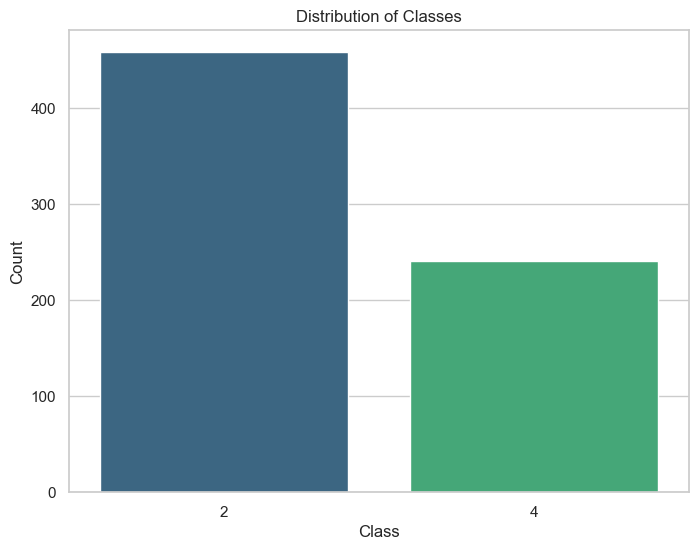

In [8]:
# Create a count plot for the 'Class' column

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Classes")
plt.show()


## there is Imbalance

## converting the object column to a numeric one

In [11]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df = df.dropna(subset=['BareNuc'])
df['BareNuc'] = df['BareNuc'].astype(int)


In [12]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Divide data into train - test

In [14]:
X = df.drop(columns=[ 'ID','Class'])
y= df['Class']

In [21]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [22]:
classifier = SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

## Evaluation 

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        89
           4       0.92      0.98      0.95        48

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137

